#### MIT License (c) 2018 by Andrew Lyasoff

#### Jupyter notebook written in Python 3. It illustrates some basic operations with large chunks of market data (extracted from public sources), creating histograms from the returns, and other similar operations.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["text.usetex"] = "True"
#import pylab
import numpy as np
#from pylab import *
import csv
from sympy import init_printing
init_printing()
import datetime
from matplotlib.dates import MONDAY
from matplotlib.dates import YearLocator, MonthLocator, WeekdayLocator, DateFormatter

In [2]:
file = open('tsla.csv','r')

In [3]:
data=csv.reader(file)

In [4]:
quotes=[]
for row in data:
    quotes.append(row)

len(quotes)

In [5]:
from datetime import date, datetime

In [6]:
info=quotes[0]
info

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [7]:
quotes[1]

['6/29/2016', '205.13', '211.78', '203', '210.19', '5994908']

In [8]:
quotes[-1]

['6/29/2010', '19', '25', '17.54', '23.89', '18783276']

In [9]:
del quotes[0]
len(quotes)

In [10]:
dates = [datetime.strptime(record[0],"%m/%d/%Y").toordinal() for record in quotes]
closes = [float(record[4]) for record in quotes]

In [11]:
years    = YearLocator()   # every year
months   = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')

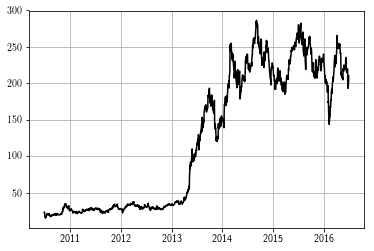

In [12]:
fig, ax = plt.subplots()
ax.plot_date(dates, closes, 'k-')
ax.grid(True)
plt.show()

In [13]:
returns=[(closes[i+1]-closes[i])/closes[i] for i in range(len(closes)-1)]

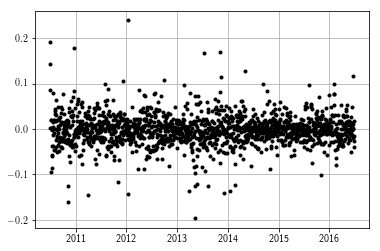

In [14]:
fig, ax = plt.subplots()
ax.plot_date(dates[1:], returns, 'k.')
ax.grid(True)
plt.show()

In [15]:
def IQR(self):
        return np.percentile(self,75) - np.percentile(self,25)

bin_size = 2 * IQR(returns) * (len(returns)**(-1.0/3))
num_bins=int((max(returns)-min(returns))/bin_size)

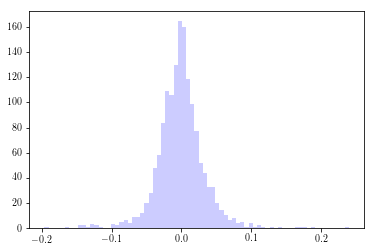

In [16]:
u,v,_=plt.hist(returns, num_bins, normed=False,facecolor='b', alpha=.2)
plt.show()

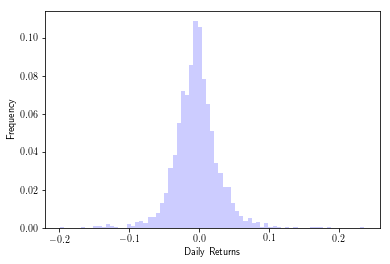

In [17]:
plt.bar(v[:-1],u/sum(u), width=bin_size, facecolor='b', alpha=.2)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
#plt.title(r'Histogram from stock returns')
plt.show()

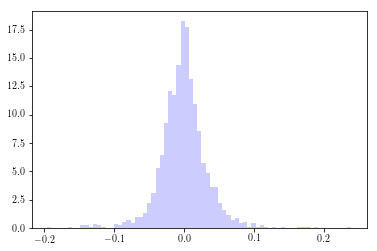

In [18]:
u,v,_=plt.hist(returns, num_bins, normed=True,facecolor='b', alpha=.2)
plt.show()

In [19]:
returns.index(min(returns))

In [20]:
returns[791]

In [21]:
closes[792]/closes[791]-1

In [22]:
date.fromordinal(dates[792])

datetime.date(2013, 5, 8)

In [23]:
print(date.fromordinal(dates[792]))

2013-05-08


In [24]:
returns.index(max(returns))

In [25]:
returns[1121]

In [26]:
closes[1122]/closes[1121]-1

In [27]:
date.fromordinal(dates[1122])

datetime.date(2012, 1, 12)

In [28]:
print(date.fromordinal(dates[1122]))

2012-01-12
